#### Housing price model building exercise

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

C:\Users\anshulkumar.singh\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anshulkumar.singh\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anshulkumar.singh\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#df.describe().transpose()

In [5]:
#df.dtypes

In [6]:
#df.isnull().sum()

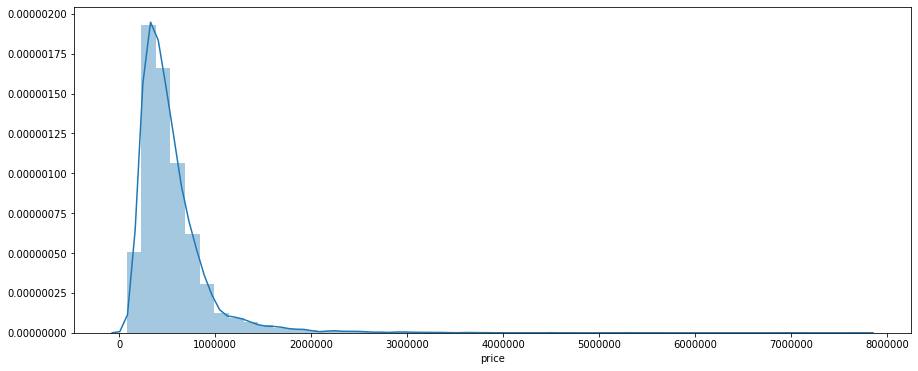

In [7]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'])

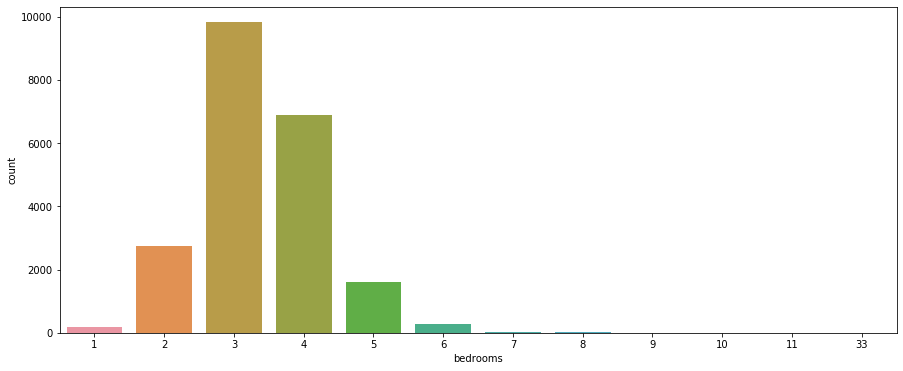

In [8]:
plt.figure(figsize=(15,6))
sns.countplot(df['bedrooms'])

In [9]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

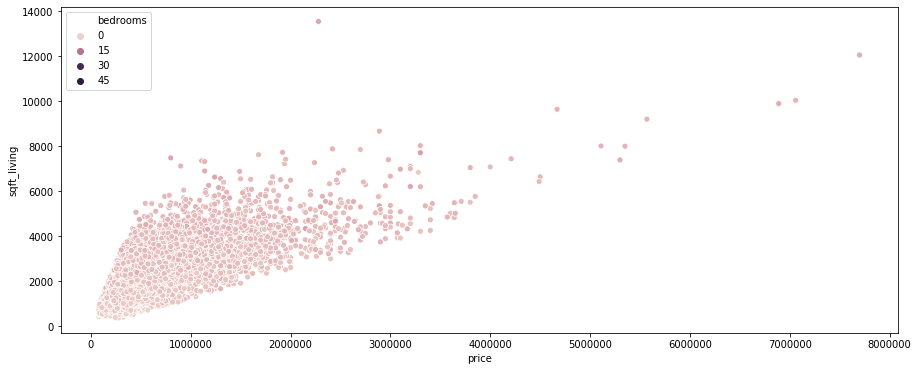

In [10]:
### square feet living space vs price variation 

plt.figure(figsize=(15,6))
sns.scatterplot(x = 'price', y= 'sqft_living', hue = 'bedrooms', data = df)

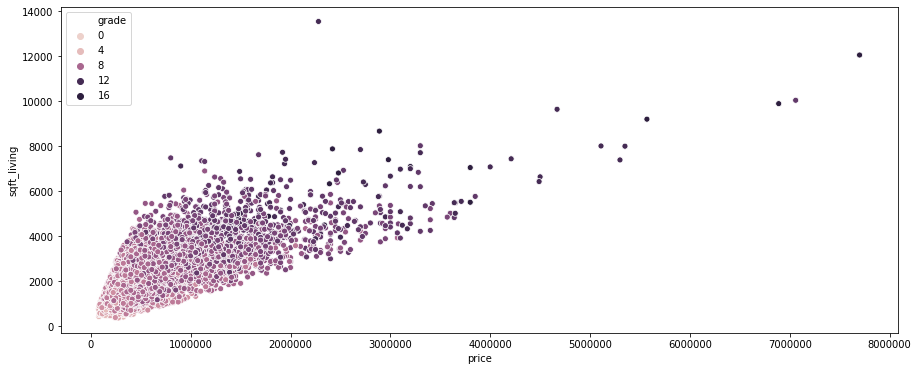

In [11]:
#df['grade']
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'price', y= 'sqft_living', hue = 'grade', data = df)

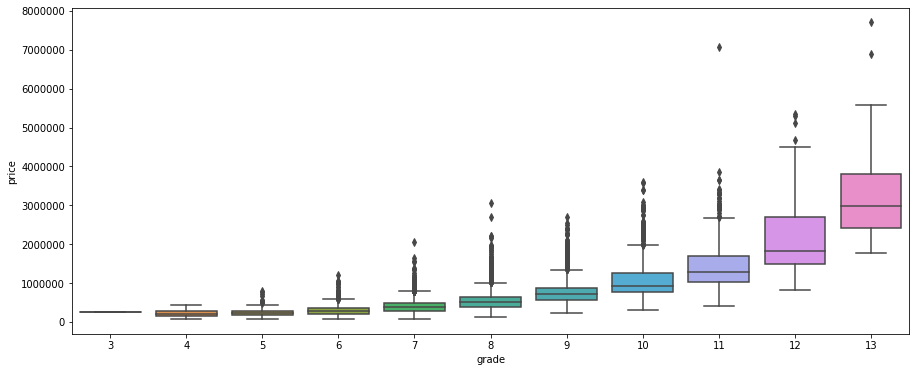

In [12]:
## price variation w.r.t grades 
plt.figure(figsize = (15,6))
sns.boxplot(x = 'grade', y = 'price', data = df)

There is linear relationship w.r.t to grades that particular house belongs. But there is some variation when it comes to grades 7-11. 

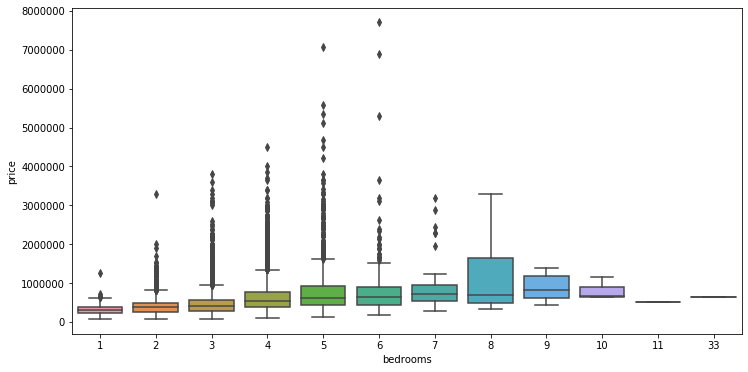

In [13]:
plt.figure(figsize=(12, 6))

sns.boxplot(x = 'bedrooms', y = 'price', data  = df)

There is lot of variation in price for  2 to 6 bedrooms house 

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

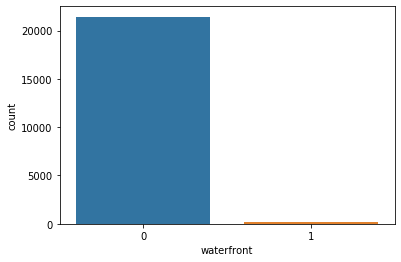

In [15]:
sns.countplot(df['waterfront'])

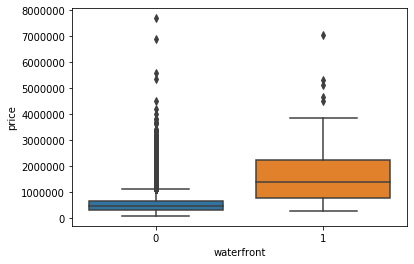

In [16]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

Mean price is quite different for houses with waterfront which make sense due to avaiable view that it provides 

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

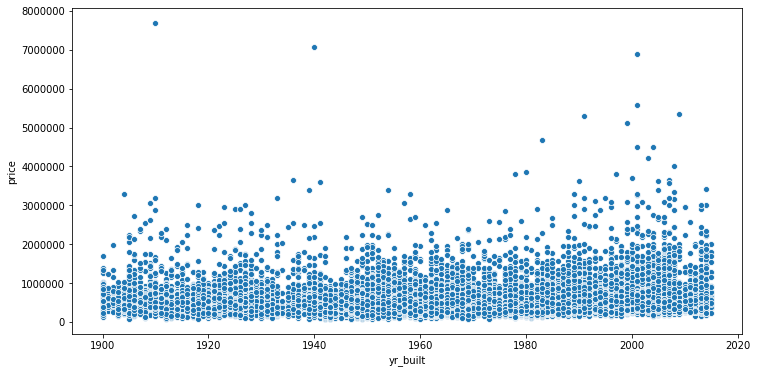

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'yr_built', y= 'price', data = df)

In [19]:
df[['view']].groupby('view')['view'].count()

view
0    19475
1      332
2      961
3      510
4      319
Name: view, dtype: int64

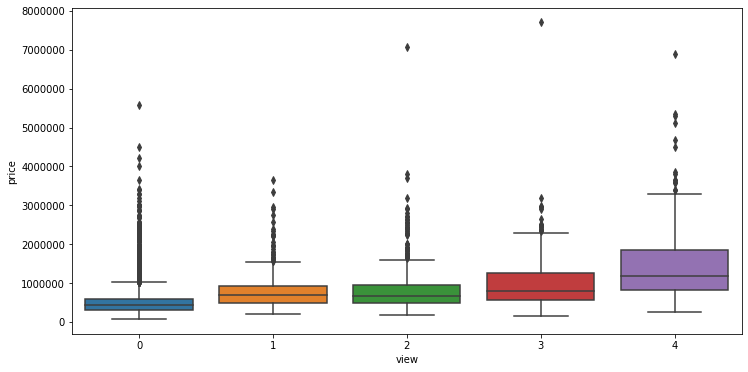

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'view', y = 'price', data = df)

In [21]:
df.groupby('view')['price'].mean()

view
0    4.967396e+05
1    8.125186e+05
2    7.928560e+05
3    9.724684e+05
4    1.464363e+06
Name: price, dtype: float64

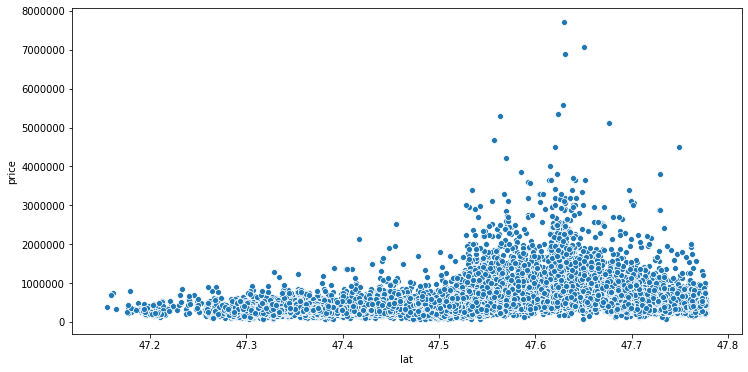

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'lat', y = 'price', data = df)

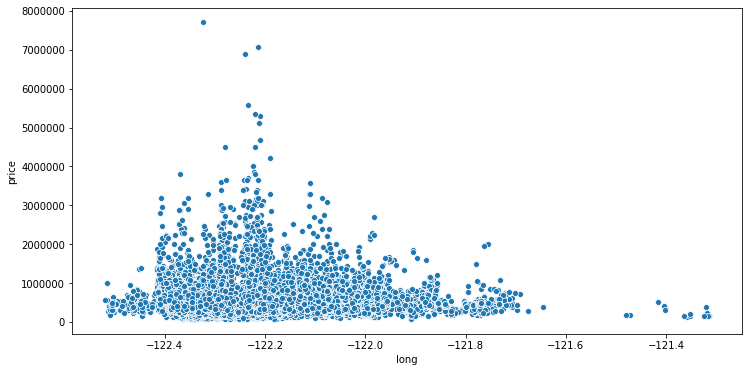

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'long', y = 'price', data = df)

In [24]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

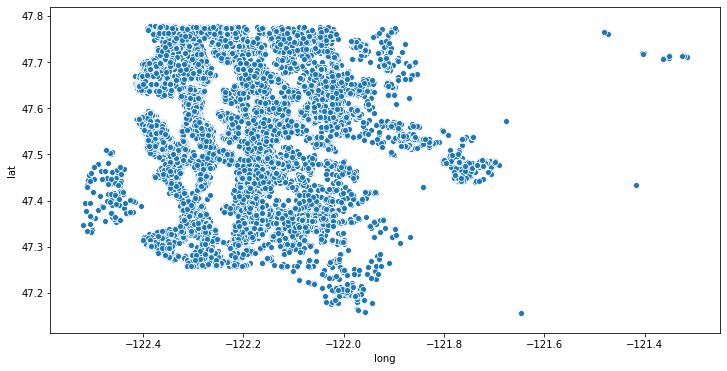

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'long', y = 'lat', data = df)

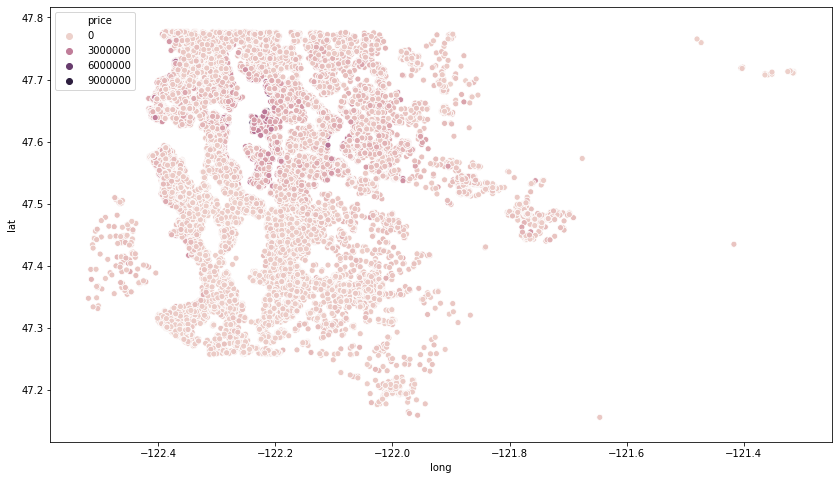

In [26]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'long', y = 'lat', hue = 'price', data = df)

In [27]:
df.sort_values('price', ascending = False).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [28]:
len(df)*.01

215.97

In [29]:
df_wo_top_1_perc = df.sort_values('price', ascending = False).iloc[216:, ]

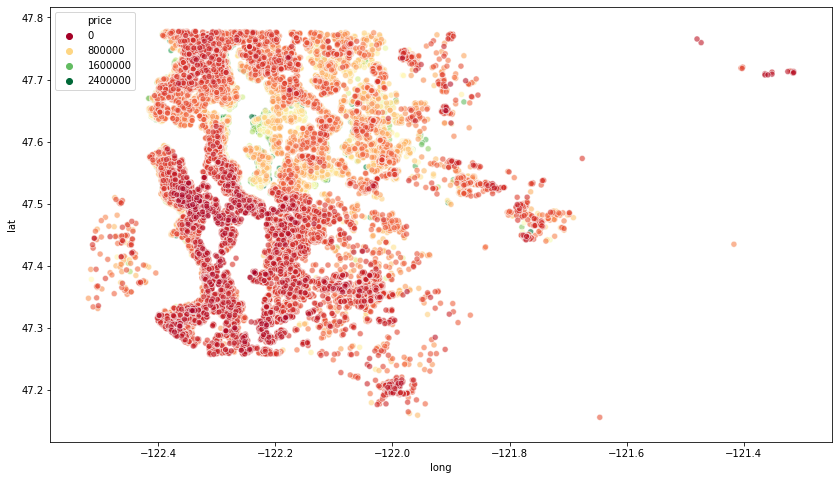

In [30]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = 'long', y = 'lat', hue = 'price', 
                alpha = .6, palette= 'RdYlGn',data = df_wo_top_1_perc)

In [31]:
#df.columns
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
df = df.drop('id', axis = 1)

In [33]:
#df.head()

df['date'] = pd.to_datetime(df['date'], format= '%m/%d/%Y')

In [34]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [35]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [37]:
df = df.drop('date', axis = 1)

In [38]:
df.shape

(21597, 21)

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


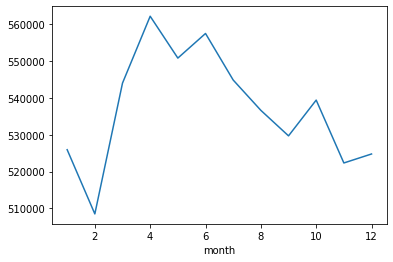

In [40]:
df.groupby('month')['price'].mean().plot()

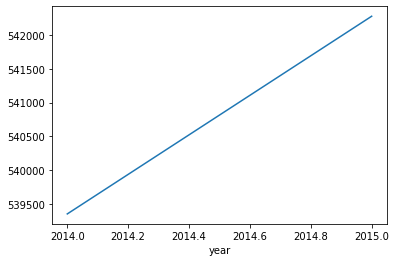

In [41]:
df.groupby('year')['price'].mean().plot()

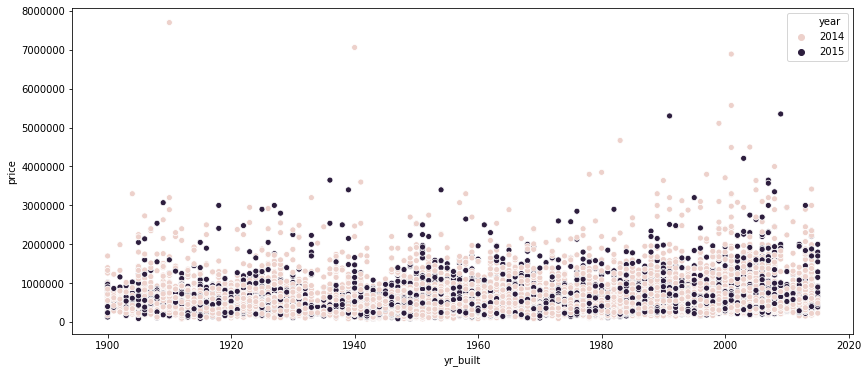

In [42]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x = 'yr_built', y = 'price', hue = 'year', data  = df)

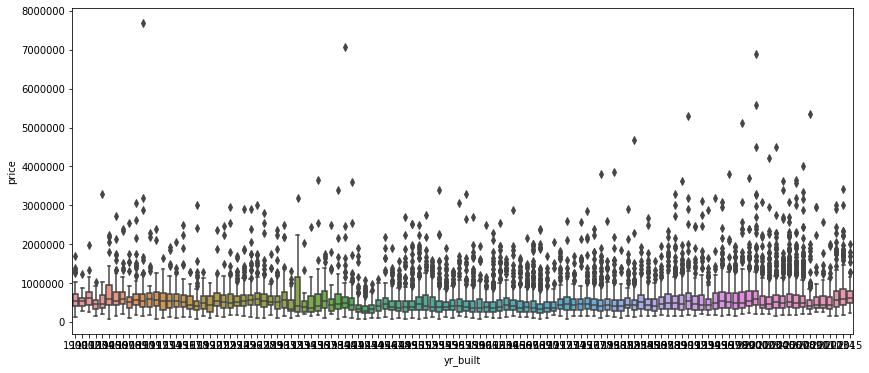

In [43]:
plt.figure(figsize=(14, 6))
sns.boxplot(x = 'yr_built', y = 'price', data  = df)

In [44]:
df = df.drop('zipcode', axis = 1)

In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [46]:
print('View: \n')
print(df['view'].value_counts())

print('\nCondition: \n')
print(df['condition'].value_counts())

print('\nGrade: \n')
print(df['grade'].value_counts())

print('\nYear Built: \n')
print(df['yr_built'].value_counts())

View: 

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

Condition: 

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

Grade: 

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Year Built: 

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64


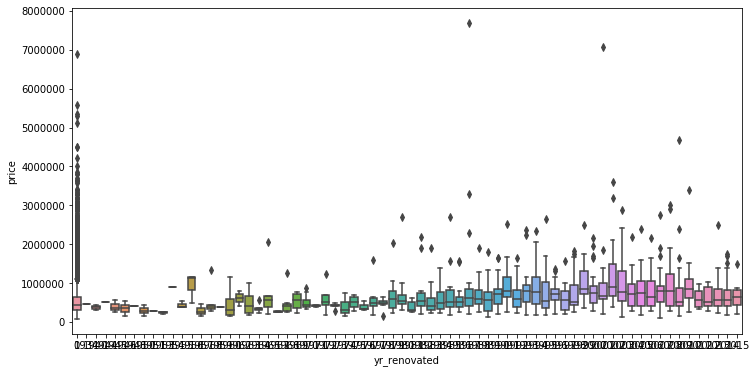

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'yr_renovated', y = 'price', data = df)

In [48]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [49]:
X = df.drop('price', axis = 1).values # values to convert dataframes to arrays to use it in NN
y = df['price'].values

In [50]:
#X; y

### Spliting test train and scaling the inputs 

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [92]:
minmax_scaler = MinMaxScaler()

In [93]:
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [94]:
X_train_scaled.min()
X_train_scaled.max()

1.0

In [56]:
X_train.shape[1:]

(19,)

In [96]:
model = Sequential()

## input layer
model.add(Flatten(input_shape = X_train.shape[1:])) 

## hidden layers 
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

# output layer
model.add(Dense(1))

## compiling models - optimizer and loss function type
model.compile(optimizer = 'adam', loss = 'mse')

In [97]:
model.fit(x = X_train_scaled, y = y_train, 
         validation_data= (X_test_scaled, y_test),
         batch_size=128, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 100us/step - loss: 430198798239.1342 - val_loss: 418552343817.4815
Epoch 2/400
15117/15117 [==============================] - 0s 23us/step - loss: 408339186471.4407 - val_loss: 317973717821.3136
Epoch 3/400
15117/15117 [==============================] - 0s 27us/step - loss: 155145060676.6020 - val_loss: 94297991678.7358
Epoch 4/400
15117/15117 [==============================] - 0s 27us/step - loss: 95315979292.2469 - val_loss: 90652828234.5877
Epoch 5/400
15117/15117 [==============================] - 0s 28us/step - loss: 90955388776.6726 - val_loss: 85820174831.5654
Epoch 6/400
15117/15117 [==============================] - 0s 27us/step - loss: 86328770528.5694 - val_loss: 81336165161.0864
Epoch 7/400
15117/15117 [==============================] - 0s 28us/step - loss: 81375971808.9420 - val_loss: 76521246548.0691
Epoch 8/400
15117/15117 [==============================] - 0s 2

15117/15117 [==============================] - 0s 28us/step - loss: 31889195508.9925 - val_loss: 30057934625.5012
Epoch 66/400
15117/15117 [==============================] - ETA: 0s - loss: 31784618666.666 - 0s 23us/step - loss: 31733731146.7323 - val_loss: 30047891390.2617
Epoch 67/400
15117/15117 [==============================] - 0s 24us/step - loss: 31741708881.5231 - val_loss: 30041169687.3877
Epoch 68/400
15117/15117 [==============================] - 0s 24us/step - loss: 31764321351.4639 - val_loss: 29971422994.3309
Epoch 69/400
15117/15117 [==============================] - 0s 24us/step - loss: 31594763481.5077 - val_loss: 29894494000.6716
Epoch 70/400
15117/15117 [==============================] - 0s 25us/step - loss: 31517047665.2754 - val_loss: 29739766973.6296
Epoch 71/400
15117/15117 [==============================] - 0s 27us/step - loss: 31462648856.0471 - val_loss: 29795170936.0988
Epoch 72/400
15117/15117 [==============================] - 0s 26us/step - loss: 314437953

15117/15117 [==============================] - 0s 20us/step - loss: 29176599085.3508 - val_loss: 27050296287.1309
Epoch 130/400
15117/15117 [==============================] - 0s 22us/step - loss: 29243171553.1621 - val_loss: 27030098895.9605
Epoch 131/400
15117/15117 [==============================] - 0s 23us/step - loss: 29185395272.0736 - val_loss: 26892417251.5556
Epoch 132/400
15117/15117 [==============================] - 0s 21us/step - loss: 29235268549.5418 - val_loss: 26907450734.6173
Epoch 133/400
15117/15117 [==============================] - 0s 20us/step - loss: 29180373962.1480 - val_loss: 26855391044.8988
Epoch 134/400
15117/15117 [==============================] - 0s 24us/step - loss: 29121649746.8101 - val_loss: 26786476214.0444
Epoch 135/400
15117/15117 [==============================] - 0s 22us/step - loss: 29079146714.6593 - val_loss: 26790493323.0617
Epoch 136/400
15117/15117 [==============================] - 0s 19us/step - loss: 29079438080.9314 - val_loss: 2670718

15117/15117 [==============================] - 0s 11us/step - loss: 27239265022.0525 - val_loss: 25628864653.5901
Epoch 194/400
15117/15117 [==============================] - 0s 13us/step - loss: 27283195290.4264 - val_loss: 24817853629.6296
Epoch 195/400
15117/15117 [==============================] - 0s 11us/step - loss: 27208345011.7605 - val_loss: 24639857691.8124
Epoch 196/400
15117/15117 [==============================] - 0s 17us/step - loss: 27084697257.3119 - val_loss: 24587732471.1506
Epoch 197/400
15117/15117 [==============================] - 0s 15us/step - loss: 27147765834.1396 - val_loss: 24437845935.0914
Epoch 198/400
15117/15117 [==============================] - 0s 13us/step - loss: 27039961888.6329 - val_loss: 24412390645.2543
Epoch 199/400
15117/15117 [==============================] - 0s 16us/step - loss: 26935294269.4217 - val_loss: 24601096328.5333
Epoch 200/400
15117/15117 [==============================] - 0s 13us/step - loss: 26948635133.8662 - val_loss: 2442588

Epoch 257/400
15117/15117 [==============================] - 0s 16us/step - loss: 21356897535.5766 - val_loss: 19157518487.7037
Epoch 258/400
15117/15117 [==============================] - 0s 19us/step - loss: 21255760376.2440 - val_loss: 19309974353.5407
Epoch 259/400
15117/15117 [==============================] - 0s 16us/step - loss: 21530492458.0316 - val_loss: 19233069010.4889
Epoch 260/400
15117/15117 [==============================] - 0s 17us/step - loss: 21278601852.2659 - val_loss: 19021911846.5580
Epoch 261/400
15117/15117 [==============================] - 0s 19us/step - loss: 21163843374.0112 - val_loss: 19013946952.0593
Epoch 262/400
15117/15117 [==============================] - 0s 21us/step - loss: 21012098710.3452 - val_loss: 18934834643.7531
Epoch 263/400
15117/15117 [==============================] - 0s 17us/step - loss: 21016945229.0523 - val_loss: 18949754520.9679
Epoch 264/400
15117/15117 [==============================] - 0s 19us/step - loss: 21022772512.5652 - val

15117/15117 [==============================] - 0s 14us/step - loss: 19102504222.8717 - val_loss: 17814382607.1704
Epoch 322/400
15117/15117 [==============================] - 0s 16us/step - loss: 19048837563.0085 - val_loss: 17645854355.9111
Epoch 323/400
15117/15117 [==============================] - 0s 15us/step - loss: 19095563357.8684 - val_loss: 17762898547.0420
Epoch 324/400
15117/15117 [==============================] - 0s 19us/step - loss: 18973718046.8548 - val_loss: 17602278427.8123
Epoch 325/400
15117/15117 [==============================] - ETA: 0s - loss: 19357899484.215 - 0s 15us/step - loss: 18989846143.0771 - val_loss: 18188431056.5926
Epoch 326/400
15117/15117 [==============================] - 0s 18us/step - loss: 18964714319.5248 - val_loss: 17781691844.5827
Epoch 327/400
15117/15117 [==============================] - 0s 16us/step - loss: 19001088909.4545 - val_loss: 17634355397.2148
Epoch 328/400
15117/15117 [==============================] - 0s 17us/step - loss: 18

15117/15117 [==============================] - 0s 19us/step - loss: 17755227377.2161 - val_loss: 17279882105.9951
Epoch 385/400
15117/15117 [==============================] - 0s 30us/step - loss: 17729338021.7895 - val_loss: 17274869249.2642
Epoch 386/400
15117/15117 [==============================] - 0s 21us/step - loss: 17884478111.2866 - val_loss: 17180645006.8543
Epoch 387/400
15117/15117 [==============================] - 0s 22us/step - loss: 17645918044.0733 - val_loss: 17118267134.1037
Epoch 388/400
15117/15117 [==============================] - 0s 26us/step - loss: 17653583662.4515 - val_loss: 17199735608.2568
Epoch 389/400
15117/15117 [==============================] - 0s 24us/step - loss: 17637042118.2870 - val_loss: 17293058250.2716
Epoch 390/400
15117/15117 [==============================] - 0s 25us/step - loss: 17562537117.9319 - val_loss: 17146135185.3827
Epoch 391/400
15117/15117 [==============================] - 0s 23us/step - loss: 17456951395.9479 - val_loss: 1721440

#### Looking at the attributes generated from models' journey

In [98]:
losses_attained = pd.DataFrame(model.history.history)

In [99]:
losses_attained.head()

,val_loss,loss
0,4.185523e+11,4.301988e+11
1,3.179737e+11,4.083392e+11
2,9.429799e+10,1.551451e+11
3,9.065283e+10,9.531598e+10
4,8.582017e+10,9.095539e+10


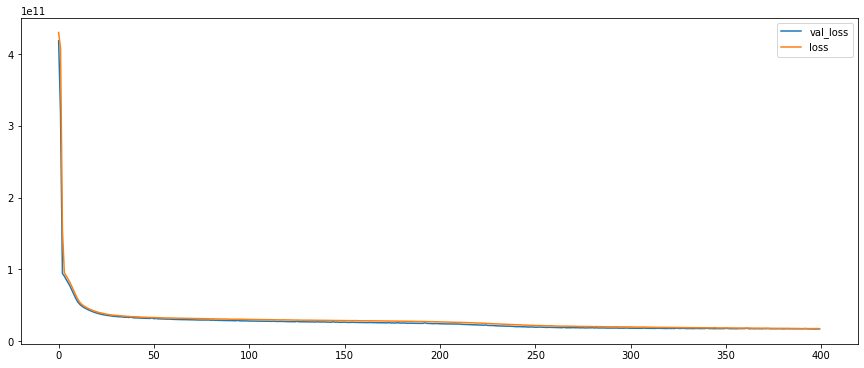

In [100]:
losses_attained.plot(figsize=(15,6))

1. Both validation loss and training loss are decreasing, this suggest that we can continue training 
2. If validation loss line moves up with epochs then it would suggest that we are overfitting

In [106]:
preds = model.predict(X_test_scaled)

#### Model Evaluation

In [107]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,6.573969
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,0.467619,3.115061
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [109]:
130926/5.402966e+05

0.2423224577019363

In [105]:
preds

array([[4.6389719e+09],
       [6.4526945e+09],
       [4.1110584e+09],
       ...,
       [3.4089295e+09],
       [6.5348813e+09],
       [9.0873559e+09]], dtype=float32)

In [110]:
## mean square error
np.sqrt(mean_squared_error(y_test, preds))

130926.88596689419

In [111]:
## mean absolute error
mean_absolute_error(y_test, preds)

78396.75125144675

In [112]:
## explained variance in model
explained_variance_score(y_test, preds)

0.8715549785734166

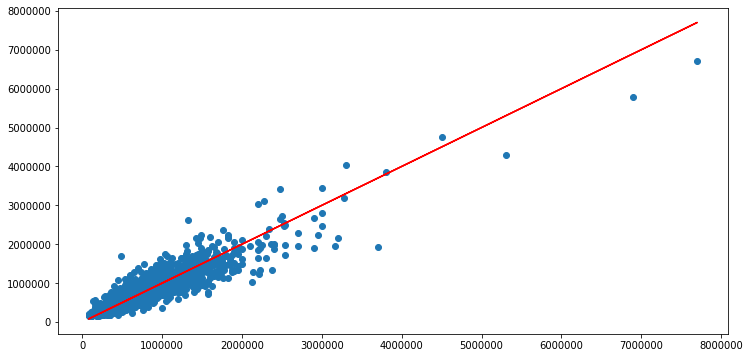

In [113]:
## True vs Preds comparison
plt.figure(figsize=(12,6))
plt.scatter(y_test, preds)
plt.plot(y_test, y_test, 'r')

Looks like we are quite off when it comes to expensive houses in the county. We can remove this anomalies to have better predictability.

In [114]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [115]:
single_house = df.drop('price', axis = 1).iloc[0].values

In [116]:
single_house

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [117]:
single_house = single_house.reshape(-1,19)

In [118]:
single_house

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [119]:
single_house_ = minmax_scaler.transform(single_house)

In [120]:
single_house_

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [121]:
model.predict(single_house_)

array([[260705.38]], dtype=float32)

In [123]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


We will try to create a model where we can remove extreame values from the training dataset to have more accurate model. 

### Improving model accuracy 

In [75]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [127]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

#### Data where we have removed price anomalies  
    top 1% houses have been removed 

In [205]:
df_wo_top_1_perc.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [130]:
df_wo_top_1_perc['year'] = df_wo_top_1_perc['date'].apply(lambda date: pd.to_datetime(date).year)
df_wo_top_1_perc['month'] = df_wo_top_1_perc['date'].apply(lambda date: pd.to_datetime(date).month)

In [132]:
df_wo_top_1_perc.drop(['id', 'date', 'zipcode'], axis = 1, inplace = True)

In [180]:
X = df_wo_top_1_perc.drop('price', axis = 1).values
y = df_wo_top_1_perc['price'].values

In [197]:
#sns.distplot(y)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
Scaler = MinMaxScaler()

In [183]:
Scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [184]:
X_train

array([[1.0000e+00, 1.0000e+00, 7.9000e+02, ..., 2.5660e+03, 2.0140e+03,
        9.0000e+00],
       [3.0000e+00, 1.7500e+00, 1.8500e+03, ..., 1.0650e+04, 2.0140e+03,
        8.0000e+00],
       [4.0000e+00, 2.2500e+00, 2.2700e+03, ..., 2.3980e+04, 2.0150e+03,
        2.0000e+00],
       ...,
       [4.0000e+00, 2.5000e+00, 2.4700e+03, ..., 3.3305e+04, 2.0140e+03,
        5.0000e+00],
       [4.0000e+00, 3.5000e+00, 4.2700e+03, ..., 1.3137e+04, 2.0140e+03,
        1.1000e+01],
       [4.0000e+00, 2.0000e+00, 1.7800e+03, ..., 8.9000e+03, 2.0140e+03,
        9.0000e+00]])

In [185]:
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

In [186]:
X_train

array([[0.        , 0.07142857, 0.05578231, ..., 0.00219976, 0.        ,
        0.72727273],
       [0.0625    , 0.17857143, 0.2       , ..., 0.01148586, 0.        ,
        0.63636364],
       [0.09375   , 0.25      , 0.25714286, ..., 0.02679803, 1.        ,
        0.09090909],
       ...,
       [0.09375   , 0.28571429, 0.28435374, ..., 0.03750966, 0.        ,
        0.36363636],
       [0.09375   , 0.42857143, 0.5292517 , ..., 0.01434267, 0.        ,
        0.90909091],
       [0.09375   , 0.21428571, 0.19047619, ..., 0.00947563, 0.        ,
        0.72727273]])

In [187]:
model1 = Sequential()

In [188]:
model1.add(Flatten(input_shape = X_train.shape[1:])) ## input layer

model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))
model1.add(Dense(19, activation='relu'))

model1.add(Dense(1))

model1.compile(optimizer='adam', loss = 'mse')

In [189]:
model1.fit(x = X_train, y = y_train, validation_data=(X_test, y_test),
          batch_size=128,
          epochs=400)

Train on 14966 samples, validate on 6415 samples
Epoch 1/400
14966/14966 [==============================] - 1s 99us/step - loss: 350622008655.6771 - val_loss: 347981748148.3373
Epoch 2/400
14966/14966 [==============================] - 0s 20us/step - loss: 340130592061.6138 - val_loss: 297990053764.1303
Epoch 3/400
14966/14966 [==============================] - 0s 20us/step - loss: 144114947683.0063 - val_loss: 54645582220.1914
Epoch 4/400
14966/14966 [==============================] - 0s 22us/step - loss: 54133487582.8839 - val_loss: 52238659199.6209
Epoch 5/400
14966/14966 [==============================] - 0s 17us/step - loss: 51753697554.7818 - val_loss: 49782422029.1691
Epoch 6/400
14966/14966 [==============================] - 0s 17us/step - loss: 49357208668.3694 - val_loss: 47345859477.5295
Epoch 7/400
14966/14966 [==============================] - 0s 21us/step - loss: 46914851244.5939 - val_loss: 44865484792.9765
Epoch 8/400
14966/14966 [==============================] - 0s 21

14966/14966 [==============================] - 0s 22us/step - loss: 21501472784.6949 - val_loss: 21448383994.8920
Epoch 66/400
14966/14966 [==============================] - 0s 23us/step - loss: 21473894876.4891 - val_loss: 21445262322.5116
Epoch 67/400
14966/14966 [==============================] - 0s 21us/step - loss: 21464263767.8535 - val_loss: 21517460862.4636
Epoch 68/400
14966/14966 [==============================] - 0s 20us/step - loss: 21414113291.7685 - val_loss: 21383163147.1339
Epoch 69/400
14966/14966 [==============================] - 0s 18us/step - loss: 21423507366.2307 - val_loss: 21390220833.3618
Epoch 70/400
14966/14966 [==============================] - 0s 21us/step - loss: 21374354831.1725 - val_loss: 21335662965.4447
Epoch 71/400
14966/14966 [==============================] - 0s 21us/step - loss: 21399676853.0098 - val_loss: 21318918671.0846
Epoch 72/400
14966/14966 [==============================] - 0s 22us/step - loss: 21369641703.6076 - val_loss: 21479168146.77

14966/14966 [==============================] - 0s 25us/step - loss: 20979711724.3972 - val_loss: 20885737985.5164
Epoch 130/400
14966/14966 [==============================] - 0s 22us/step - loss: 20979782809.9490 - val_loss: 20864914414.8402
Epoch 131/400
14966/14966 [==============================] - 0s 22us/step - loss: 21003908432.7719 - val_loss: 20879247046.1755
Epoch 132/400
14966/14966 [==============================] - 0s 26us/step - loss: 20996827143.9369 - val_loss: 20927818158.9899
Epoch 133/400
14966/14966 [==============================] - 0s 22us/step - loss: 20974470151.2527 - val_loss: 20865959384.6522
Epoch 134/400
14966/14966 [==============================] - 0s 20us/step - loss: 20978957227.2939 - val_loss: 20857409926.6045
Epoch 135/400
14966/14966 [==============================] - 0s 20us/step - loss: 20958882812.5789 - val_loss: 20876162054.3850
Epoch 136/400
14966/14966 [==============================] - 0s 24us/step - loss: 20967736511.7178 - val_loss: 2084410

14966/14966 [==============================] - 0s 22us/step - loss: 20814570490.9368 - val_loss: 20877312833.0076
Epoch 194/400
14966/14966 [==============================] - 0s 22us/step - loss: 20789977755.2490 - val_loss: 20681542196.4371
Epoch 195/400
14966/14966 [==============================] - 0s 26us/step - loss: 20780808275.7482 - val_loss: 20661124052.9808
Epoch 196/400
14966/14966 [==============================] - 0s 19us/step - loss: 20788121896.9504 - val_loss: 20644952226.6588
Epoch 197/400
14966/14966 [==============================] - 0s 21us/step - loss: 20818235374.4840 - val_loss: 20645555388.5980
Epoch 198/400
14966/14966 [==============================] - 0s 22us/step - loss: 20756985799.6205 - val_loss: 20685291469.4784
Epoch 199/400
14966/14966 [==============================] - 0s 21us/step - loss: 20790010048.9493 - val_loss: 20645109954.5839
Epoch 200/400
14966/14966 [==============================] - 0s 21us/step - loss: 20769394820.1908 - val_loss: 2061855

14966/14966 [==============================] - 0s 18us/step - loss: 20410227313.3749 - val_loss: 20245819652.2700
Epoch 258/400
14966/14966 [==============================] - 0s 17us/step - loss: 20462909490.6321 - val_loss: 20306206917.1380
Epoch 259/400
14966/14966 [==============================] - 0s 20us/step - loss: 20412168407.3917 - val_loss: 20190732941.6680
Epoch 260/400
14966/14966 [==============================] - 0s 16us/step - loss: 20372405354.7379 - val_loss: 20295935117.8276
Epoch 261/400
14966/14966 [==============================] - 0s 19us/step - loss: 20355340246.9469 - val_loss: 20201500624.9902
Epoch 262/400
14966/14966 [==============================] - 0s 20us/step - loss: 20359316740.8237 - val_loss: 20159112096.5437
Epoch 263/400
14966/14966 [==============================] - 0s 17us/step - loss: 20389738328.7772 - val_loss: 20144863558.3551
Epoch 264/400
14966/14966 [==============================] - 0s 16us/step - loss: 20365846146.7540 - val_loss: 2023372

14966/14966 [==============================] - 0s 23us/step - loss: 19654243891.3847 - val_loss: 19374812539.5903
Epoch 322/400
14966/14966 [==============================] - 0s 18us/step - loss: 19572803251.4703 - val_loss: 19372421742.2217
Epoch 323/400
14966/14966 [==============================] - 0s 18us/step - loss: 19582665623.5884 - val_loss: 19342035220.6316
Epoch 324/400
14966/14966 [==============================] - 0s 21us/step - loss: 19546110924.1363 - val_loss: 19233179944.4253
Epoch 325/400
14966/14966 [==============================] - 0s 20us/step - loss: 19566996297.5876 - val_loss: 19219708320.1447
Epoch 326/400
14966/14966 [==============================] - 0s 20us/step - loss: 19551395654.7139 - val_loss: 19284078774.6120
Epoch 327/400
14966/14966 [==============================] - 0s 23us/step - loss: 19553407071.5168 - val_loss: 19196174758.2104
Epoch 328/400
14966/14966 [==============================] - 0s 22us/step - loss: 19521085957.2685 - val_loss: 1917285

14966/14966 [==============================] - 0s 17us/step - loss: 19157516370.9272 - val_loss: 18900432069.7765
Epoch 386/400
14966/14966 [==============================] - 0s 22us/step - loss: 19190840559.3393 - val_loss: 18841626633.8968
Epoch 387/400
14966/14966 [==============================] - 0s 22us/step - loss: 19200830471.8001 - val_loss: 18816898260.4620
Epoch 388/400
14966/14966 [==============================] - 0s 21us/step - loss: 19171793010.1275 - val_loss: 18821495006.1992
Epoch 389/400
14966/14966 [==============================] - 0s 20us/step - loss: 19183481795.5152 - val_loss: 18814837421.1143
Epoch 390/400
14966/14966 [==============================] - 0s 17us/step - loss: 19134214043.8305 - val_loss: 18813706851.6864
Epoch 391/400
14966/14966 [==============================] - 0s 24us/step - loss: 19185937140.4709 - val_loss: 18821852786.3719
Epoch 392/400
14966/14966 [==============================] - 0s 26us/step - loss: 19154121141.0782 - val_loss: 1882308

In [204]:
pd.DataFrame(model1.history.history)

,val_loss,loss
0,3.479817e+11,3.506220e+11
1,2.979901e+11,3.401306e+11
2,5.464558e+10,1.441149e+11
3,5.223866e+10,5.413349e+10
4,4.978242e+10,5.175370e+10
...,...,...
395,1.880009e+10,1.913899e+10
396,1.879978e+10,1.917781e+10
397,1.901078e+10,1.911450e+10
398,1.925039e+10,1.918547e+10


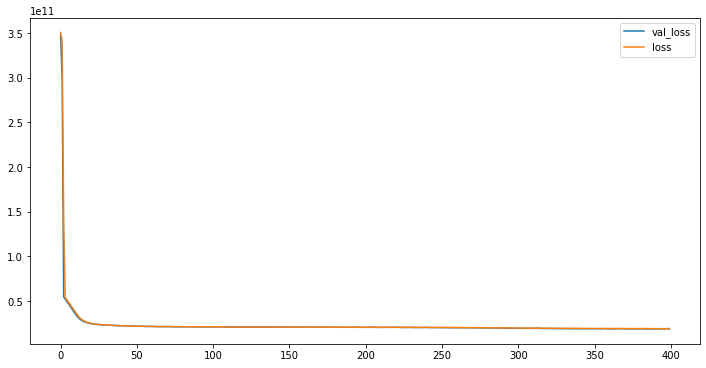

In [190]:
### History of the model training 
pd.DataFrame(model1.history.history).plot(figsize = (12,6))

In [191]:
## Predictions
preds1 = model1.predict(X_test)

In [206]:
preds1.mean()

521908.62

In [208]:
y_test.mean()

517696.6288386594

In [193]:
df_wo_top_1_perc['price'].describe()['mean']

518367.48037977645

In [198]:
y_test

array([ 459000.,  405000.,  550000., ..., 1070000.,  530000.,  338500.])

In [209]:
### Error Metrics 
print('Mean Square Error:')
print(np.sqrt(mean_squared_error(y_test, preds1)))

print('\nMean Absolute Error')
print(mean_absolute_error(y_test, preds1))

print('\n% Error in predicted price with respect to Mean Price: ')
print(round(mean_absolute_error(y_test, preds1)*100/df_wo_top_1_perc['price'].describe()['mean'], 2))

print('\nExplained Variance Score')
print(explained_variance_score(y_test, preds1))

Mean Square Error:
137078.3293614152

Mean Absolute Error
93278.04446487724

% Error in predicted price with respect to Mean Price: 
17.99

Explained Variance Score
0.7657419674008868


In [170]:
preds_df = pd.DataFrame(preds1, columns=['Predictions'])

In [171]:
preds_df['True Y'] = y_test

In [200]:
X_test

array([[6.25000000e-02, 2.85714286e-01, 1.90476190e-01, ...,
        3.84699770e-03, 0.00000000e+00, 8.18181818e-01],
       [9.37500000e-02, 3.21428571e-01, 2.69387755e-01, ...,
        9.35386750e-03, 0.00000000e+00, 9.09090909e-01],
       [6.25000000e-02, 1.78571429e-01, 1.97278912e-01, ...,
        1.17201904e-02, 0.00000000e+00, 6.36363636e-01],
       ...,
       [3.12500000e-02, 2.50000000e-01, 4.78911565e-01, ...,
        5.20705899e-03, 0.00000000e+00, 6.36363636e-01],
       [6.25000000e-02, 3.57142857e-02, 7.34693878e-02, ...,
        6.20918524e-02, 0.00000000e+00, 1.00000000e+00],
       [3.12500000e-02, 2.50000000e-01, 1.04761905e-01, ...,
        1.11423941e-04, 1.00000000e+00, 1.81818182e-01]])

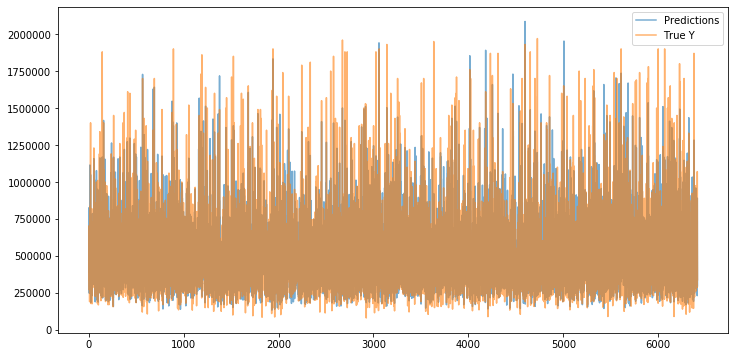

In [203]:
preds_df.plot(figsize=(12,6), alpha = 0.6)

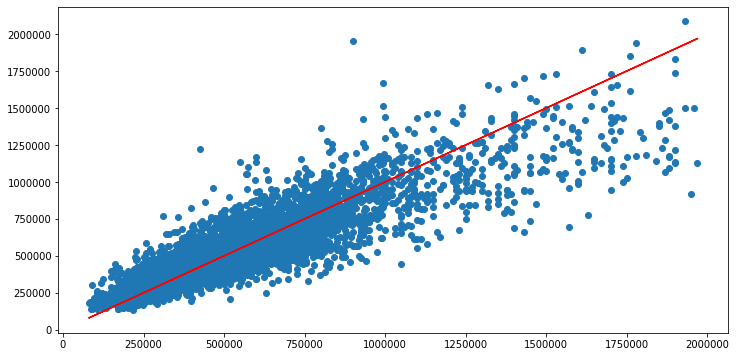

In [179]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, preds1)
plt.plot(y_test, y_test, 'r')